In [1]:
import glob
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
CRISPRi_targeted_effects = pd.read_csv("/Users/jamshid/Downloads//CRISPRi_targeted_effects.csv")
CRISPRi_whole_effects = pd.read_csv("/Users/jamshid/Downloads//CRISPRi_whole_effects.csv")
CRISPRn_targeted_effects = pd.read_csv("/Users/jamshid/Downloads//CRISPRn_targeted_effects.csv")
CRISPRn_whole_effects = pd.read_csv("/Users/jamshid/Downloads//CRISPRn_whole_effects.csv")


plt.rcParams.update({
    'font.size': 16,            # Base font size
    'axes.titlesize': 18,       # Title font size
    'axes.labelsize': 17,       # Axis label font size
    'xtick.labelsize': 14,      # X-tick label size
    'ytick.labelsize': 14,      # Y-tick label size
    'legend.fontsize': 16      # Legend font size
})

def compare_effects_by_dimension_grid(df1, df2, name1="df1", name2="df2"):
    # Get all unique methods and y_labels combinations
    methods = sorted(set(df1["method"]).intersection(df2["method"]))
    y_labels = sorted(set(df1["y_label"]).intersection(df2["y_label"]))

    results_all = []
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    plot_idx = 0
    for y_label in y_labels:
        for method in methods:
            sub1 = df1[(df1["method"] == method) & (df1["y_label"] == y_label)]
            sub2 = df2[(df2["method"] == method) & (df2["y_label"] == y_label)]

            common_dims = sorted(set(sub1["dimension"]).intersection(sub2["dimension"]))
            results = []

            for dim in common_dims:
                d1 = sub1[sub1["dimension"] == dim]
                d2 = sub2[sub2["dimension"] == dim]

                merged = d1.merge(d2, on=["target_gene", "gRNA_simplified"], suffixes=("_1", "_2"))

                if len(merged) > 0:
                    ari = adjusted_rand_score(merged["effect_label_1"], merged["effect_label_2"])
                else:
                    ari = float("nan")

                results.append({
                    "method": method,
                    "y_label": y_label,
                    "dimension": dim,
                    "ARI": ari
                })

            df_plot = pd.DataFrame(results)
            results_all.extend(results)

            # Plot in the correct subplot
            ax = axes[plot_idx]
            ax.plot(df_plot["dimension"], df_plot["ARI"], marker="o", color="steelblue")
            ax.set_title(f"{y_label} — {method.capitalize()} distance", fontsize=16)
            ax.set_ylim(-1, 1)

            ax.grid(True, linestyle="--", alpha=0.6)
            ax.set_xlabel("Dimension")
            ax.set_ylabel("ARI")
            plot_idx += 1

    # Adjust layout
    plt.suptitle(f"Adjusted Rand Index by Dimension ({name1} vs {name2})", fontsize=18, y=1.02)

    plt.tight_layout()

    plt.savefig("ARIn.pdf",  bbox_inches="tight")
    plt.show()

    # Return combined results
    df_results_all = pd.DataFrame(results_all)
    return df_results_all




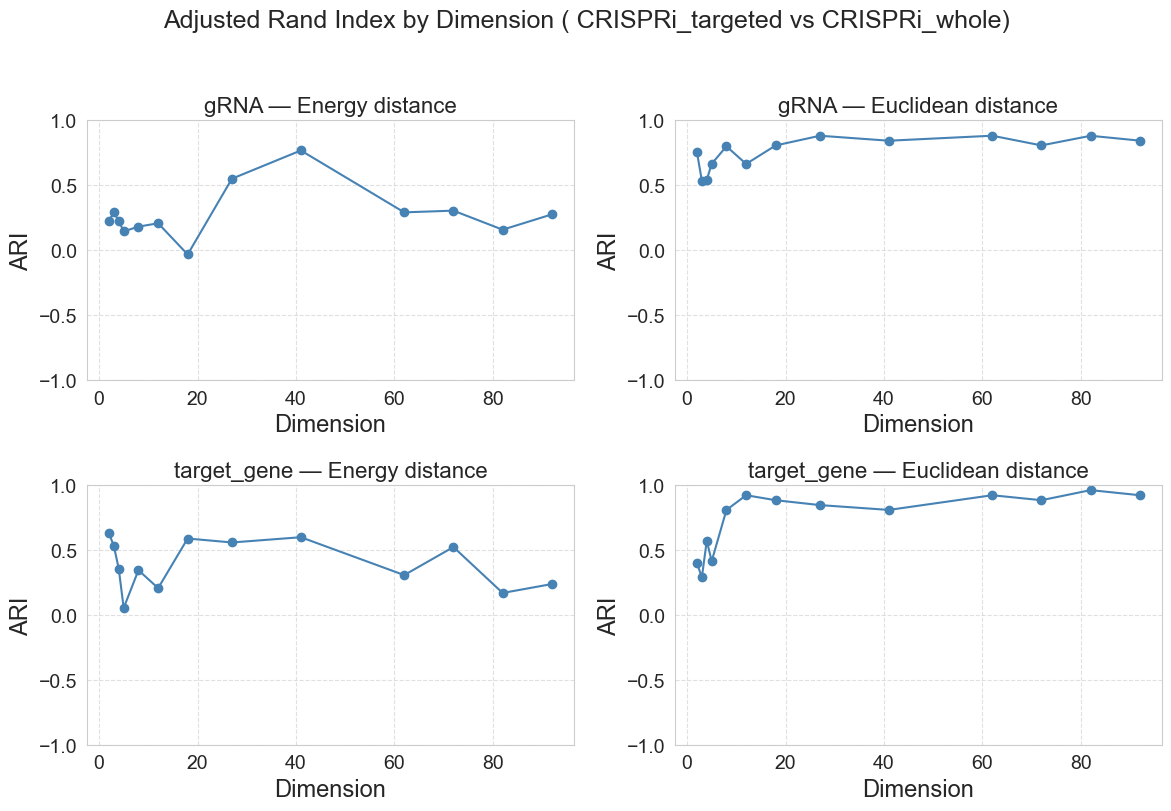

In [3]:
# Example usage:
df_results_all = compare_effects_by_dimension_grid(
    CRISPRi_targeted_effects,
    CRISPRi_whole_effects,
    name1=" CRISPRi_targeted",
    name2="CRISPRi_whole"
)

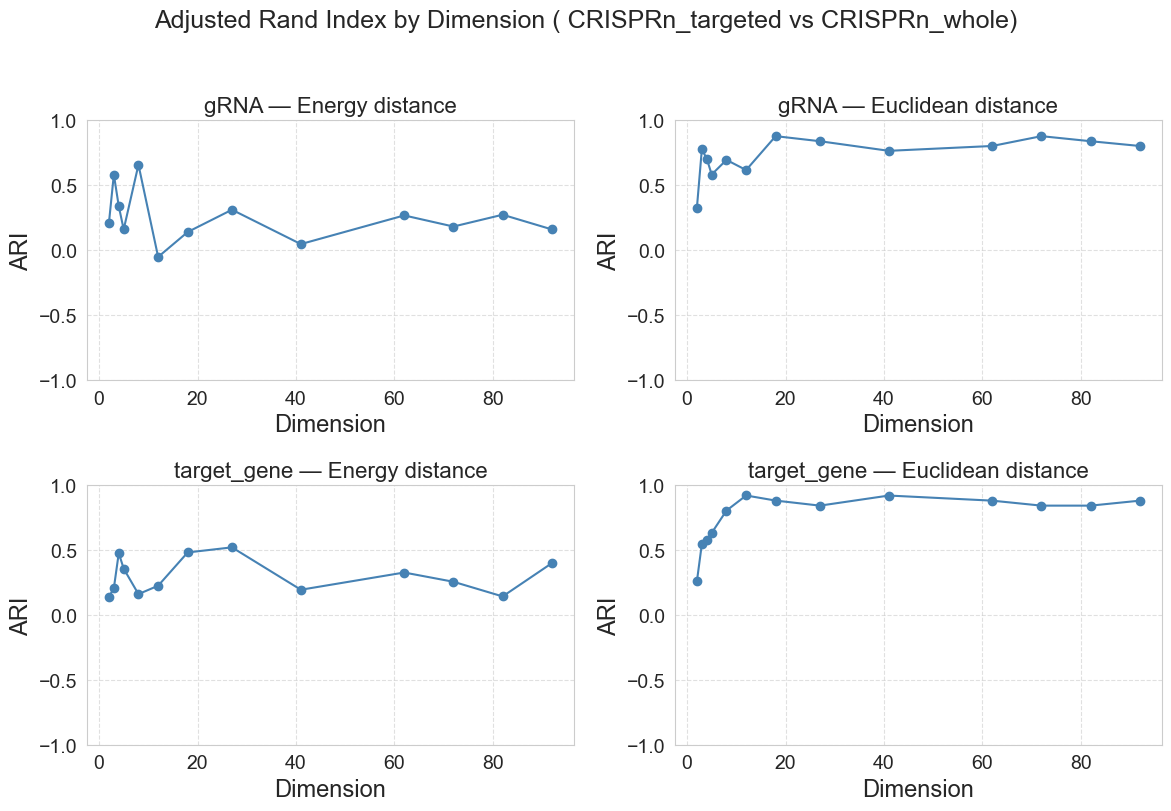

In [4]:
df_results_all = compare_effects_by_dimension_grid(
    CRISPRn_targeted_effects,
    CRISPRn_whole_effects,
    name1=" CRISPRn_targeted",
    name2="CRISPRn_whole"
)

Sampling

In [5]:


# --- Load all CSVs ---
folder = "/Users/jamshid/Downloads/CRISPRi_targeted_samples/"
files = sorted(glob.glob(folder + "*.csv"))

dfs = []
for i, f in enumerate(files):
    df = pd.read_csv(f)
    df["sample"] = i  # assign sample index if not already in CSV
    dfs.append(df)

CRISPRi_targeted_samples = pd.concat(dfs, ignore_index=True).dropna()


folder = "/Users/jamshid/Downloads/CRISPRi_whole_samples/"
files = sorted(glob.glob(folder + "*.csv"))

dfs = []
for i, f in enumerate(files):
    df = pd.read_csv(f)
    df["sample"] = i  # assign sample index if not already in CSV
    dfs.append(df)

CRISPRi_whole_samples = pd.concat(dfs, ignore_index=True).dropna()



In [6]:
# --- Load all CSVs ---
folder = "/Users/jamshid/Downloads/CRISPRn_targeted_samples/"
files = sorted(glob.glob(folder + "*.csv"))

dfs = []
for i, f in enumerate(files):
    df = pd.read_csv(f)
    df["sample"] = i  # assign sample index if not already in CSV
    dfs.append(df)

CRISPRn_targeted_samples = pd.concat(dfs, ignore_index=True).dropna()


folder = "/Users/jamshid/Downloads/CRISPRn_whole_samples/"
files = sorted(glob.glob(folder + "*.csv"))

dfs = []
for i, f in enumerate(files):
    df = pd.read_csv(f)
    df["sample"] = i  # assign sample index if not already in CSV
    dfs.append(df)

CRISPRn_whole_samples = pd.concat(dfs, ignore_index=True).dropna()

In [7]:


def compare_effects_by_dimension_grid_sampling(df1, df2, name1="df1", name2="df2"):

    df1_samples = sorted(df1["sample"].unique())
    df2_samples = sorted(df2["sample"].unique())

    methods = sorted(set(df1["method"]).intersection(df2["method"]))
    y_labels = sorted(set(df1["y_label"]).intersection(df2["y_label"]))

    results_all = []

    # --- Compute ARI for all sample pairs ---
    for sample1 in df1_samples:
        for sample2 in df2_samples:
            for y_label in y_labels:
                for method in methods:
                    sub1 = df1[(df1["method"] == method) &
                               (df1["y_label"] == y_label) &
                               (df1["sample"] == sample1)]
                    sub2 = df2[(df2["method"] == method) &
                               (df2["y_label"] == y_label) &
                               (df2["sample"] == sample2)]

                    common_dims = sorted(set(sub1["dimension"]).intersection(sub2["dimension"]))
                    for dim in common_dims:
                        d1 = sub1[sub1["dimension"] == dim]
                        d2 = sub2[sub2["dimension"] == dim]

                        merged = d1.merge(
                            d2,
                            on=["target_gene", "gRNA_simplified"],
                            suffixes=("_1", "_2")
                        )

                        if len(merged) > 0:
                            ari = adjusted_rand_score(
                                merged["effect_label_1"], merged["effect_label_2"]
                            )
                        else:
                            ari = float("nan")

                        results_all.append({
                            "sample_1": sample1,
                            "sample_2": sample2,
                            "method": method,
                            "y_label": y_label,
                            "dimension": dim,
                            "ARI": ari
                        })

    df_results_all = pd.DataFrame(results_all)

    # --- Plot mean ARI by dimension with legend ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes = axes.flatten()

    unique_pairs = list(df_results_all.groupby(["method", "y_label"]).groups.keys())
    if len(unique_pairs) > 2:
        unique_pairs = unique_pairs[:2]  # only first two

    for ax, (method, y_label) in zip(axes, unique_pairs):
        sub = df_results_all[(df_results_all["method"] == method) &
                             (df_results_all["y_label"] == y_label)]

        # Scatter all points (individual ARI)
        scatter = ax.scatter(sub["dimension"], sub["ARI"], alpha=0.1, s=30, color="steelblue", label="Individual ARI values")

        # Compute mean ARI per dimension
        mean_df = sub.groupby("dimension", as_index=False)["ARI"].mean().dropna()

        # Plot mean values connected by line
        line, = ax.plot(mean_df["dimension"], mean_df["ARI"], color="darkorange", lw=2, marker="o", label="Mean ARI per dimension")

        # Labels and titles
        ax.set_title(f"{y_label} — {method.capitalize()}", fontsize=16)
        ax.set_xlabel("Dimension")
        ax.set_ylabel("ARI")
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend(frameon=True, fontsize=13, loc="best")
        ax.set_ylim(-1, 1)

    plt.suptitle(f"Adjusted Rand Index by Dimension ({name1} vs {name2})", fontsize=18, y=1.02)
    plt.tight_layout()
    plt.savefig("ARIi_sampling.pdf", bbox_inches="tight")
    plt.show()

    return df_results_all

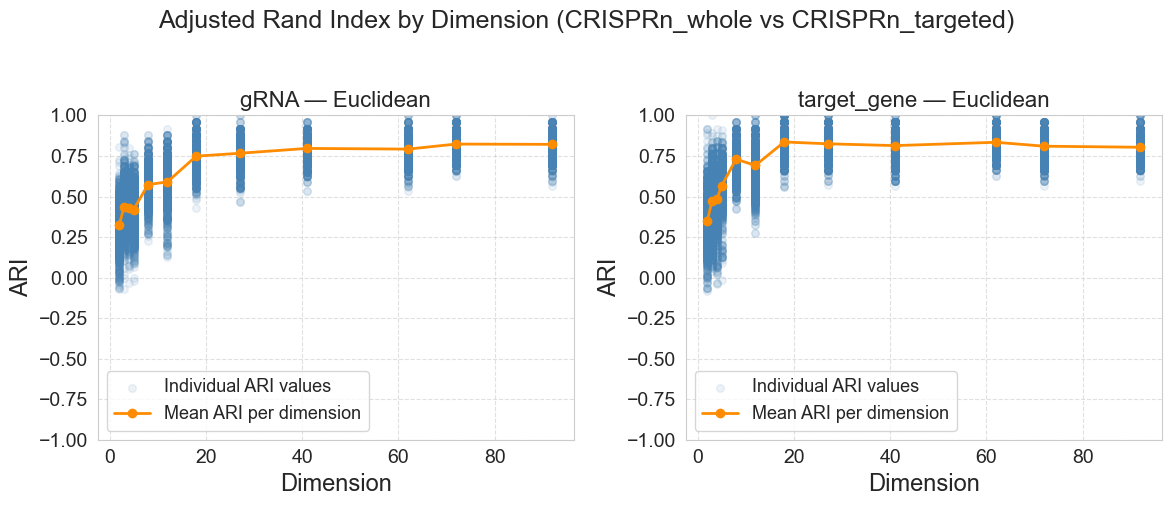

In [8]:
df_results_all = compare_effects_by_dimension_grid_sampling(CRISPRn_whole_samples, CRISPRn_targeted_samples, name1="CRISPRn_whole", name2="CRISPRn_targeted")

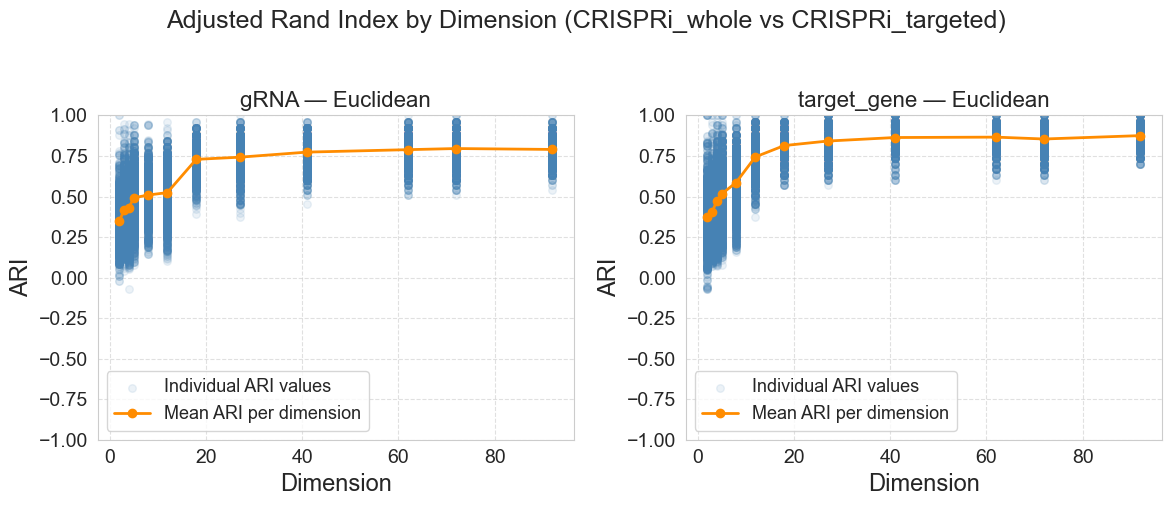

In [9]:
df_results_all = compare_effects_by_dimension_grid_sampling(CRISPRi_whole_samples, CRISPRi_targeted_samples, name1="CRISPRi_whole", name2="CRISPRi_targeted")

In [10]:

plt.rcParams.update({
    'font.size': 16,            # Base font size
    'axes.titlesize': 18,       # Title font size
    'axes.labelsize': 18,       # Axis label font size
    'xtick.labelsize': 16,      # X-tick label size
    'ytick.labelsize': 16,      # Y-tick label size
    'legend.fontsize': 16      # Legend font size
})

def plot_silhouette_by_dimension(df, name):
    # --- Prepare data ---
    df = df[["sample", "dimension", "sil_score_test", "sil_score_train", "y_label", "method"]].drop_duplicates()

    df_melted = df.melt(
        id_vars=["sample", "dimension", "y_label", "method"],
        value_vars=["sil_score_train", "sil_score_test"],
        var_name="Dataset",
        value_name="Silhouette Score"
    )

    df_melted["Dataset"] = df_melted["Dataset"].map({
        "sil_score_train": "Train Set Mean Value",
        "sil_score_test": "Test Set Mean Value"
    })

    # --- Plot setup ---
    y_labels = sorted(df_melted["y_label"].unique())
    fig, axes = plt.subplots(1, len(y_labels), figsize=(12, 5))

    if len(y_labels) == 1:
        axes = [axes]

    palette = {"Train Set Mean Value": "#1f77b4", "Test Set Mean Value": "#ff7f0e"}

    # --- Plot each y_label ---
    for ax, y_label in zip(axes, y_labels):
        sub = df_melted[df_melted["y_label"] == y_label]

        # Scatter all points
        sns.scatterplot(
            data=sub,
            x="dimension",
            y="Silhouette Score",
            hue="Dataset",
            alpha=0.15,
            s=60,
            ax=ax,
            palette=palette,
            legend=False
        )

        # Compute mean per dimension + dataset
        mean_df = (
            sub.groupby(["dimension", "Dataset"], as_index=False)["Silhouette Score"]
            .mean()
            .dropna()
        )

        # Plot connected mean lines
        sns.lineplot(
            data=mean_df,
            x="dimension",
            y="Silhouette Score",
            hue="Dataset",
            style="Dataset",
            markers=True,
            dashes=False,
            lw=2,
            ax=ax,
            palette=palette
        )

        ax.set_title(f"{y_label} - euclidean", fontsize=18)
        ax.set_xlabel("Dimension")
        ax.set_ylabel("Silhouette Score")
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend(fontsize=15, frameon=True)
        ax.set_ylim(0.1, 0.7)

    plt.suptitle(f"Silhouette Score by Dimension - {name}", fontsize=20, y=1.03)
    plt.tight_layout()
    plt.savefig(f"sil_score_sample_{name}.pdf", bbox_inches="tight")
    plt.show()

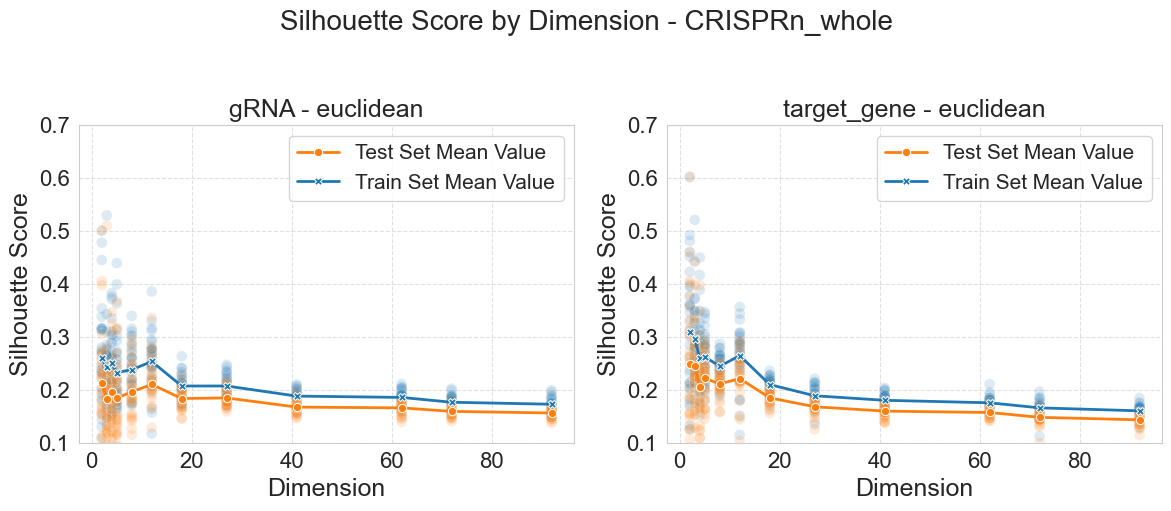

In [11]:
plot_silhouette_by_dimension(CRISPRn_whole_samples, "CRISPRn_whole")

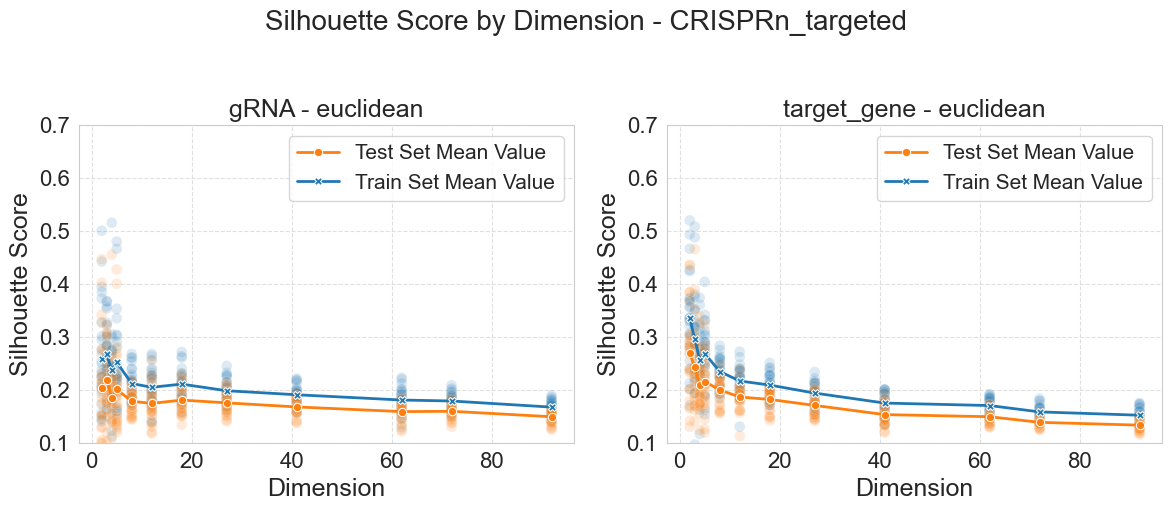

In [12]:
plot_silhouette_by_dimension(CRISPRn_targeted_samples, "CRISPRn_targeted")

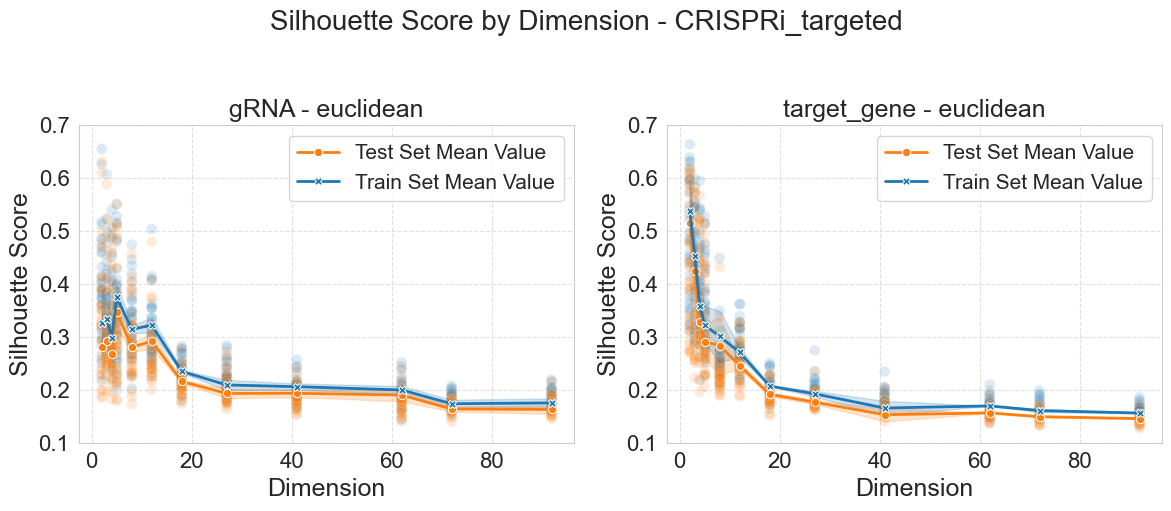

In [13]:
plot_silhouette_by_dimension(CRISPRi_targeted_samples, "CRISPRi_targeted")

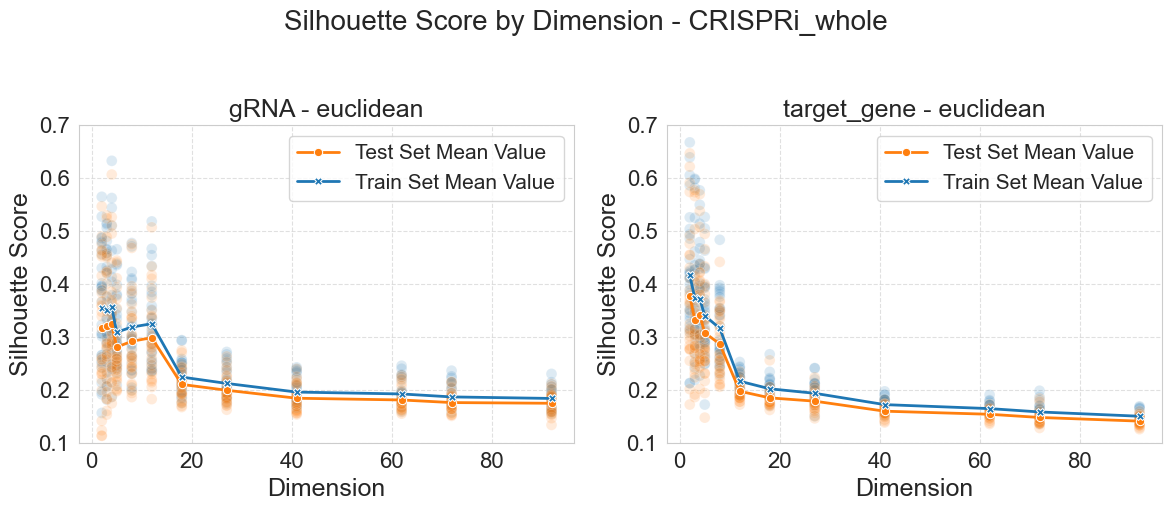

In [14]:
plot_silhouette_by_dimension(CRISPRi_whole_samples, "CRISPRi_whole")